In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("C:/Users/Admin/Desktop/Animation_Movies.csv")

## Opis zbioru danych

In [7]:
print("Rozmiar zbioru danych:", df.shape)
print("\nLiczba braków danych:\n", df.isnull().sum())
print("\nTypy zmiennych:\n", df.dtypes)

Rozmiar zbioru danych: (51945, 23)

Liczba braków danych:
 id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

Typy zmiennych:
 id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   in

## Statystyki opisowe zmiennych numerycznych

In [34]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,5.194500e+04,51945.000000,51945.000000,5.194500e+04,51945.000000,5.194500e+04,51945.000000
mean,6.188122e+05,2.597083,40.395380,1.863464e+06,20.901415,5.759513e+05,1.886233
std,3.479748e+05,3.318748,482.705948,3.049824e+07,39.016002,7.606628e+06,9.700913
min,1.200000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.300810e+05,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000
50%,6.119150e+05,0.000000,0.000000,0.000000e+00,7.000000,0.000000e+00,0.600000
75%,9.159040e+05,6.000000,2.000000,0.000000e+00,19.000000,0.000000e+00,0.882000
max,1.238314e+06,10.000000,19463.000000,1.450027e+09,3720.000000,2.600000e+08,1008.942000


### Wnioski:
Filmy mają średnią ocenę równą ok. 2.6, a średni zarobek to 1.8 mln $, czyli bardzo dużo, 
bo mowa o wysokobudżetowych filmach animowanych. Średni czas trwania  to tylko 21 min, co
wskazuje na krótkie metraże lub braki w danych. Na braki danych wskazują także kwantyle 50% i 25%, przy których figuruje wartość 0.

## Analiza grupowa względem zmiennej 'production_countries'

In [42]:

print("\nŚrednie statystyki a statusu filmu:\n")

df.groupby('original_language')[["vote_count", "runtime", "popularity",	"vote_average"]].mean().sort_values("vote_count", ascending=False)


Średnie statystyki a statusu filmu:



,vote_count,runtime,popularity,vote_average
original_language,,,,
en,60.877869,19.478449,2.012573,2.669285
ja,49.799812,44.161914,4.169498,3.733652
dz,16.000000,21.666667,1.222000,1.944333
fr,13.730821,16.426284,1.327965,3.021672
he,11.024390,19.097561,0.733329,1.453695
...,...,...,...,...
se,0.000000,8.000000,0.600000,0.000000
mg,0.000000,3.000000,0.600000,0.000000
mr,0.000000,4.000000,0.000000,0.000000


### Wnioski:
Jak można było się spodziewać, najwięcej mamy produkcji po angielsku i po japońsku, bowiem na rynku jest mnóstwo łatwego w produkcji Anime. 
Japońskie animacje wyróżniają się też najwyższą średnią oceną, wysoko stoją także produkcje francuskie.

In [ ]:
## Analiza po zmiennej multilabel 'genres'

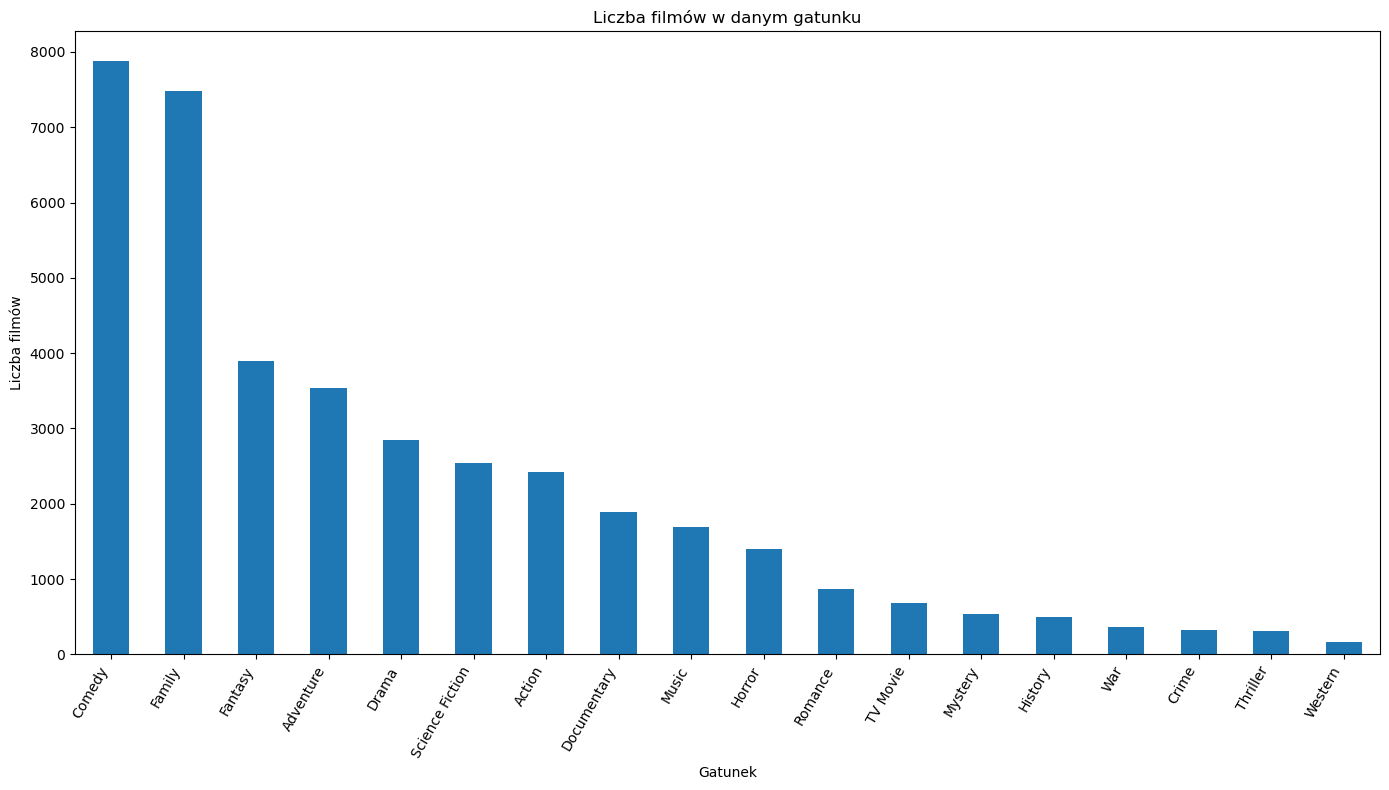

In [49]:
df["genres"] = df["genres"].fillna("")
df["genres_list"] = df["genres"].apply(lambda x: [g.strip() for g in x.split(",") if g.strip() and g.strip() != "Animation"])
sum_genres = sum(df["genres_list"], [])
genre_counts = pd.Series(sum_genres).value_counts()


plt.figure(figsize=(14, 8))
genre_counts.plot(kind='bar')
plt.title("Liczba filmów w danym gatunku")
plt.xlabel("Gatunek")
plt.ylabel("Liczba filmów")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Wnioski:
Dla ciekawszych wniosków usunąłem kategorię "Animacja", bo daje nieciekawe wyniki. Poza tym dominują spodziewane gatunki,
czyli Komedia, Familijne, Fantasy, Przygodowe. Z ciekawszych dalszych pozycji wymienić można Sci-Fi, Dokument albo Horror, 
dość nietypowo jak na animację.

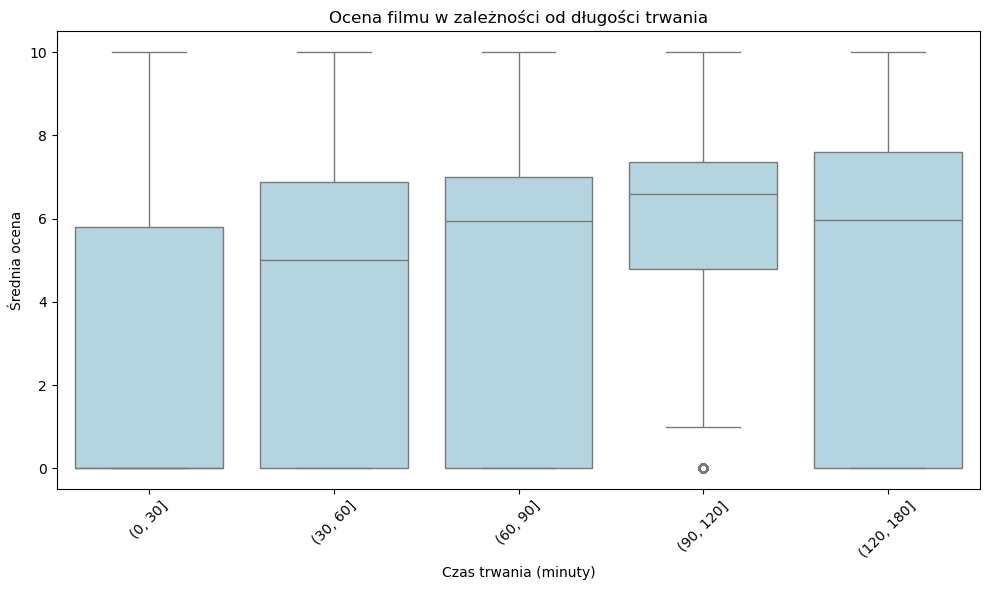

In [64]:

# Wykres 1
bins = [0, 30, 60, 90, 120, 180]
runtime_bins = pd.cut(df["runtime"], bins=bins)
plt.figure(figsize=(10,6))
sns.boxplot(x=runtime_bins, y="vote_average", data=df, color = "lightblue")
plt.title("Ocena filmu w zależności od długości trwania")
plt.xlabel("Czas trwania (minuty)")
plt.ylabel("Średnia ocena")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
### Wnioski:
Średnio najwyżej oceniane są filmy w przedziale od 90 do 120 minut czasu trwania, czyli kinowy standard, oraz te powyżej 2 godzin, ale można podejrzewać
że w tym przedziale są też jakieś krótkie seriale. Najgorzej wypadają krótkie metraże.

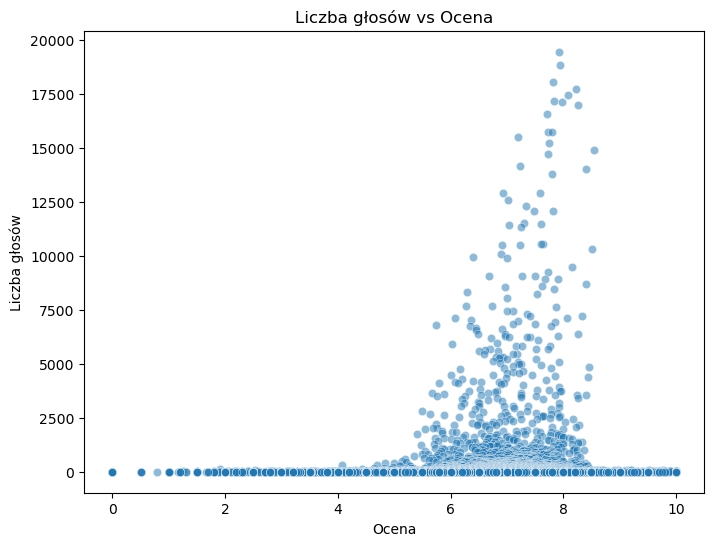

In [66]:
# Wykres 2

import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='vote_average', y='vote_count', alpha=0.5)
plt.title('Liczba głosów vs Ocena')
plt.xlabel('Ocena')
plt.ylabel('Liczba głosów')
plt.show()

In [ ]:
### Wnioski:
Faktycznie tendencja wydaje się być lekko wzrostowa. Wielu punktom na wykresie widocznie brak danych.
